In [1]:
#in this code we will try to learn a model how to pridict data from the dataset fashion_minist which is a dataset with a 
#70000 data labaled in 10 classes 60000 to train and 10000 to test
import tensorflow as tf
from tensorflow import keras

In [2]:
#the partition of the training data for training and testing/validating 
(x_train, y_train), (x_val, y_val) = keras.datasets.fashion_mnist.load_data() 

In [3]:
#preprocessing section  
def preprocess(x, y):
  x = tf.cast(x, tf.float32) / 255.0 #tf.cast change the original value to the new one in this case to a float
  y = tf.cast(y, tf.int64)

  return x, y

def create_dataset(xs, ys, n_classes=10):
  ys = tf.one_hot(ys, depth=n_classes) #makeing vectors from the data using one_hot 
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocess) \
    .shuffle(len(ys)) \
    .batch(128)         #Then we use shuffle and batch to convert the data into chunks,We don’t want our model to make predictions based on the order of the training data, so we just shuffle it

In [4]:
train_dataset = create_dataset(x_train, y_train)# the creation of train_dataset to use it later in the training phase using the function we created in the preprocessing section
val_dataset = create_dataset(x_val, y_val)#creation of Val_dataset to use it later 

In [5]:
#creation of the neural network 
#it containes 5 layers , Reshape as an input layer (we used Reshape because we want to change the shape of the input data from 2d to one array)
#4 Dense(interconnected) layers ,units refers to the number of neurons , with an activation function called relu
#the last layer is a bit defirent it has 10 neuron cause we have 10 classes in our model with an activation function called softmax
model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),#creation of the input layer type Reshape 
    keras.layers.Dense(units=256, activation='relu'), 
    keras.layers.Dense(units=192, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [6]:
#Training our neural network 
#Tensorflow allows us to choose an optimizer and a loss function in this case i used sgd as an optimizer and Categorical cross entropy as a loss function 
#compile the model 
model.compile(optimizer='sgd', 
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
#fit the model 
history = model.fit(
    train_dataset.repeat(), 
    epochs=10, 
    steps_per_epoch=500,
    validation_data=val_dataset.repeat(), 
    validation_steps=2,
   
)

Epoch 1/10
500/500 [==============================] - 25s 20ms/step - loss: 1.0909 - accuracy: 0.6542 - val_loss: 0.7197 - val_accuracy: 0.7539
Epoch 2/10
500/500 [==============================] - 11s 23ms/step - loss: 0.6061 - accuracy: 0.7959 - val_loss: 0.5276 - val_accuracy: 0.8320
Epoch 3/10
500/500 [==============================] - 11s 22ms/step - loss: 0.5276 - accuracy: 0.8174 - val_loss: 0.4961 - val_accuracy: 0.8281
Epoch 4/10
500/500 [==============================] - 11s 21ms/step - loss: 0.4860 - accuracy: 0.8299 - val_loss: 0.5413 - val_accuracy: 0.7930
Epoch 5/10
500/500 [==============================] - 11s 23ms/step - loss: 0.4623 - accuracy: 0.8374 - val_loss: 0.4632 - val_accuracy: 0.8320
Epoch 6/10
500/500 [==============================] - 11s 23ms/step - loss: 0.4437 - accuracy: 0.8463 - val_loss: 0.4752 - val_accuracy: 0.8281
Epoch 7/10
500/500 [==============================] - 12s 23ms/step - loss: 0.4308 - accuracy: 0.8480 - val_loss: 0.5170 - val_accuracy:

In [7]:
loss = model.evaluate(train_dataset )

469/469 [==============================] - 7s 13ms/step - loss: 0.3875 - accuracy: 0.8661


In [8]:
predicted = model.predict(x_val)

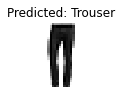

In [59]:
import matplotlib.pyplot as plt
import numpy as  np 
classes =["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot" ]

images = x_val.reshape((-1, 28, 28))
select = np.random.randint(images.shape[0], size=1)
for index, value in enumerate(select):
 plt.subplot(3,4,index+1)
 plt.axis('off')
 plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
 pred=predicted[value]
 indices = [index for index, item in enumerate(pred) if item == max(pred)]
 num_class=indices[0]
 plt.title('Predicted: {}'.format(classes[num_class]) )



plt.show()


